# Customer Analytics & A/B Testing in Python

**Team:** Saurav and Swapnil

## Chapter 1: Key Performance Indicators: Measuring Business Success

### What is A/B testing?

A/B testing is a randomized experiement with two variants, A and B.

A/B is a tool which allowes to

*   Test two or more different ideas against each other in a real world
*   See which one empirically performs better

![A/B testing](http://snapagency.com/wp-content/uploads/2018/03/what-is-a-b-testing.png)

### Why is A/B Testing Important?

*   It is done in real world their is no guessing and you get to know which idea is better under the conditions which matters most
*   It provides accurate answers quickly providing companies to rapidly iterate over ideas
*   It is statistical way to establish casual relationships

### How Does A/B Testing Work?

* A/B testing works by exposing very unique randomly assigned group of users to each of the ideas you want to test.
* Then you can observe these users, and  measure how they behave.
*  then untangle the impact of each of your ideas ultimately determining which is best


### Where Can A/B Testing be Used?
* It can be used in variety of industry.
   for example: Pharmaceutical compant testing the impact of different drugs, Mobile game company trying to incentivize users to spend more, etc.


### Key Performance Indicators
Typically A/B testing is done to improve Key Performance Indicators aka KPIs. These are the metrics which are most improtant to a company. e.g. for a mobile game it can revenue or playtime per user.

Experience, domain knowledge and Exploratory data analysis help decide which KPI is important.

Stable, Generalizable KPI is better than custom KPI.

### Dataset 1: User Demographics
Set of user demographics tied to unique user id number. 

In [15]:
# Import pandas 
import pandas as pd

# Load the customer_data
customer_data = pd.read_csv('https://assets.datacamp.com/production/repositories/1646/datasets/c3a701a4729471ae0b92d8c300b470fd2ec0a73a/user_demographics_v1.csv')

# Print the columns of customer data
print(customer_data.columns)

Index(['uid', 'reg_date', 'device', 'gender', 'country', 'age'], dtype='object')


### Dataset 2: User Actions
Set of user actions

In [16]:
# Load the app_purchases
app_purchases = pd.read_csv('https://assets.datacamp.com/production/repositories/1646/datasets/5decd183ef3710475958bbc903160fd6354379d5/purchase_data_v1.csv')

# Print the columns of app_purchases
print(app_purchases.columns)

Index(['date', 'uid', 'sku', 'price'], dtype='object')


### Cleanup of the dataset

In [ ]:
#both customer_data and app_purchases has common column uid and date - reg_date in customer data and date in purchase data

#renaming reg_date to date for easy merging
customer_data.rename(columns={'reg_date':'date'}, inplace=True)

#changing string date in customer_data and app_purchases to datetime
customer_data['date'] = pd.to_datetime(customer_data["date"], utc = True).dt.tz_localize(None)
app_purchases['date'] = pd.to_datetime(app_purchases["date"], utc = True).dt.tz_localize(None)

### Merging both the dataset

In [18]:
# Merge on the 'uid' and 'date' field
purchase_data = app_purchases.merge(customer_data, on=['uid', 'date'], how='inner')

# Examine the results 
print(purchase_data.head())

        date       uid             sku  price device gender country  age
0 2016-03-30  94055095    sku_four_599    599    iOS      F     BRA   16
1 2015-10-28  69627745     sku_one_199    199    and      F     BRA   18
2 2017-02-02  11604973  sku_seven_1499    499    and      F     USA   16
3 2016-06-05  22495315    sku_four_599    599    and      F     USA   19
4 2018-02-17  51365662     sku_two_299    299    iOS      M     TUR   16


In [19]:
# Calculate the mean purchase price 
purchase_price_mean = purchase_data.price.agg('mean')

# Examine the output 
print(purchase_price_mean)

# Calculate the mean and median purchase price 
purchase_price_summary = purchase_data.price.agg(['mean', 'median'])

# Examine the output 
print(purchase_price_summary)

# Calculate the mean and median of price and age
purchase_summary = purchase_data.agg({'price': ['mean', 'median'], 'age': ['mean', 'median']})

# Examine the output 
print(purchase_summary)

470.42857142857144
mean      470.428571
median    499.000000
Name: price, dtype: float64
             price        age
mean    470.428571  22.771429
median  499.000000  20.000000


In [20]:
# Group the data 
grouped_purchase_data = purchase_data.groupby(by = ['device', 'gender'])

# Aggregate the data
purchase_summary = grouped_purchase_data.agg({'price': ['mean', 'median', 'std']})

# Examine the results
print(purchase_summary)

                    price                   
                     mean median         std
device gender                               
and    F       477.571429    499  200.685638
       M       511.500000    549  229.518129
iOS    F       427.571429    599  221.466971
       M       449.000000    499  164.316767


### Calculating KPIs
the average amount paid per purchase within a user's first 28 days

In [21]:
#define a current date
current_date = pd.to_datetime('2018-03-17')

# Compute max_purchase_date 
max_purchase_date = current_date - pd.Timedelta(days=28)

# Filter to only include users who registered before our max date
purchase_data_filt = purchase_data[purchase_data.date < max_purchase_date]

# Filter to contain only purchases within the first 28 days of registration
purchase_data_filt = purchase_data_filt[(purchase_data_filt.date <= 
                        purchase_data_filt.date + pd.Timedelta(days=28))]

# Output the mean price paid per purchase
print(purchase_data_filt.price.mean())

483.375


## Chapter 2: Exploring and Visualizing Customer Behavior

In [22]:
purchase_data.set_index('date', inplace=True)
purchase_data_subset = purchase_data.loc['2015-01-01':'2019-01-01']
purchase_data_subset.resample('M').mean().head()

,uid,price,age
date,,,
2015-07-31,60266650.0,749.0,20.5
2015-08-31,50511591.0,599.0,16.0
2015-09-30,NaN,NaN,NaN
2015-10-31,69627745.0,199.0,18.0
2015-11-30,NaN,NaN,NaN


Text(0.5, 1.0, 'Price - Time Series')

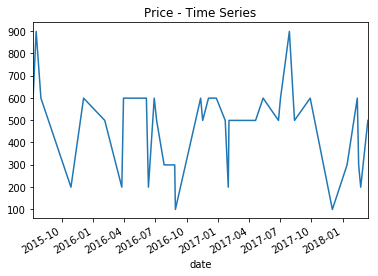

In [23]:
import matplotlib.pyplot as plt

purchase_data_subset_price = purchase_data_subset['price']
purchase_data_subset_price.plot()
plt.title('Price - Time Series')

In [24]:
country_pivot = pd.pivot_table(purchase_data_subset, values=['price'], columns=['country'], index=['date'], )
print(country_pivot.head())

            price                          
country       BRA    CAN    DEU FRA TUR USA
date                                       
2015-07-09  599.0    NaN    NaN NaN NaN NaN
2015-07-18  899.0    NaN    NaN NaN NaN NaN
2015-08-01    NaN    NaN  599.0 NaN NaN NaN
2015-10-28  199.0    NaN    NaN NaN NaN NaN
2015-12-04    NaN  599.0    NaN NaN NaN NaN


Text(0, 0.5, 'Number of Rides')

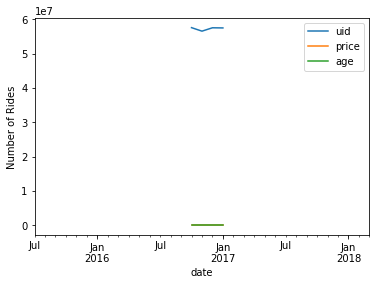

In [25]:
# Your answer goes here
daily = purchase_data_subset.resample('M').sum()
# Your answer goes here
rolling = daily.rolling(30, center=True, win_type='gaussian').mean(std=10)
rolling.plot().set_ylabel("Number of Rides")

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


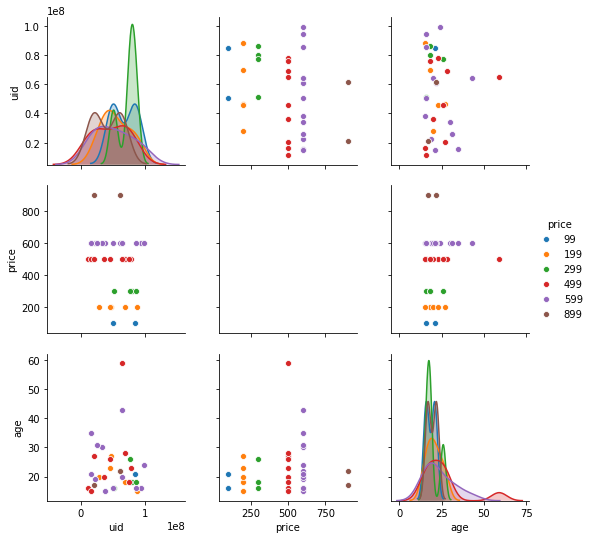

In [26]:
import seaborn as sns

sns.pairplot(purchase_data_subset, hue="price")

## Chapter 3: The Design and Application of A/B Testing

### Average Revenue and Standard Deviation per user

In [27]:
average_revenue = purchase_data['price'].mean()
print("Average Revenue: "+str(average_revenue))
std_revenue = purchase_data['price'].std()
print("Standard Deviation: "+str(std_revenue))

Average Revenue: 470.42857142857144
Standard Deviation: 199.36875171316058


### Conversion rate sensitivities

In [28]:
#if we have a small sensitivity of 0.01
small_sensitivity = 0.01 
small_conversion_rate = 1 + small_sensitivity
small_purchasers = average_revenue * small_conversion_rate
small_purchaser_lift = small_purchasers - average_revenue
print("Additional Revenue if small sensitivity: "+str(small_purchaser_lift))

Additional Revenue if small sensitivity: 4.7042857142857315


In [29]:
#if we have a medium sensitivity of 0.02
medium_sensitivity = 0.02
medium_conversion_rate = 1 + medium_sensitivity
medium_purchasers = average_revenue * medium_conversion_rate
medium_purchaser_lift = medium_purchasers - average_revenue
print("Additional Revenue if medium sensitivity: "+str(medium_purchaser_lift))

Additional Revenue if medium sensitivity: 9.408571428571463


In [30]:
#if we have a large sensitivity of 0.05
large_sensitivity = 0.05
large_conversion_rate = 1 + large_sensitivity
large_purchasers = average_revenue * large_conversion_rate
large_purchaser_lift = large_purchasers - average_revenue
print("Additional Revenue if large sensitivity: "+str(large_purchaser_lift))

Additional Revenue if large sensitivity: 23.5214285714286


## Chapter 4: Analyzing A/B Testing Results

### Calculating p value

In [ ]:
def find_p_value(mean, new_mean, sd):
  p_value = float(new_mean-mean)/float(sd)
  print("p_value: "+str(p_value))  
  return str(p_value)

### Is p value Statistically SIgnificant

In [ ]:
def is_statistically_significant(p_value):
  if float(p_value) >= 0.05:
    print("Statistically Significant")
  else:
    print("Not Statistically Significant")

### Check if small sensitivity is statistically significant?

In [33]:
#small sensitivity
small_p_value = find_p_value(average_revenue, small_purchasers, std_revenue)
is_statistically_significant(small_p_value)

p_value: 0.023595902937958737
Not Statistically Significant


### Check if medium sensitivity is statistically significant?

In [34]:
#medium sensitivity
medium_p_value = find_p_value(average_revenue, medium_purchasers, std_revenue)
is_statistically_significant(medium_p_value)

p_value: 0.047191805875917474
Not Statistically Significant


### Check if large sensitivity is statistically significant?

In [35]:
#large sensitivity
large_p_value = find_p_value(average_revenue, large_purchasers, std_revenue)
is_statistically_significant(large_p_value)

p_value: 0.1179795146897934
Statistically Significant
